# Introduction to ML - Unsupervised Learning Example for Beginners using K-means clustering & PCA

## Tutorial Overview

1. What is Machine Learning in a nutshell
2. What is Supervised Learning (Supervised Vs Unsupervised Learning)
3. Problem formulation - What are we trying to solve?
4. Explaining how the whole automated process will work (Excel -> SQL -> Python -> SQL -> Power BI)
5. Loading the Raw Data into Python


6. Cleaning the Raw Data
7. What is Kmeans
8. Running Kmeans
9. Running PCA
10. Ways to improve results
11. Running Kmeans with optimal parameters


12. Creating the front end PowerBI Dashboard
13. Creating Insights from Clusters


14. Creating NPS analytics per Cluster
15. Discussing how these results can be used in real life



## 1. What is Machine Learning (ML) in a nutshell
- “Machine learning is the science (and art) of programming computers so they can learn from data” by Aurélien Géron book (Hands-On Machine Learning with Scikit-Learn and TensorFlow)


- ML uses statistical models and algorithms to perform tasks like predictions & classifications without explicit instructions


- ML is a subset of Artificial Intelligence

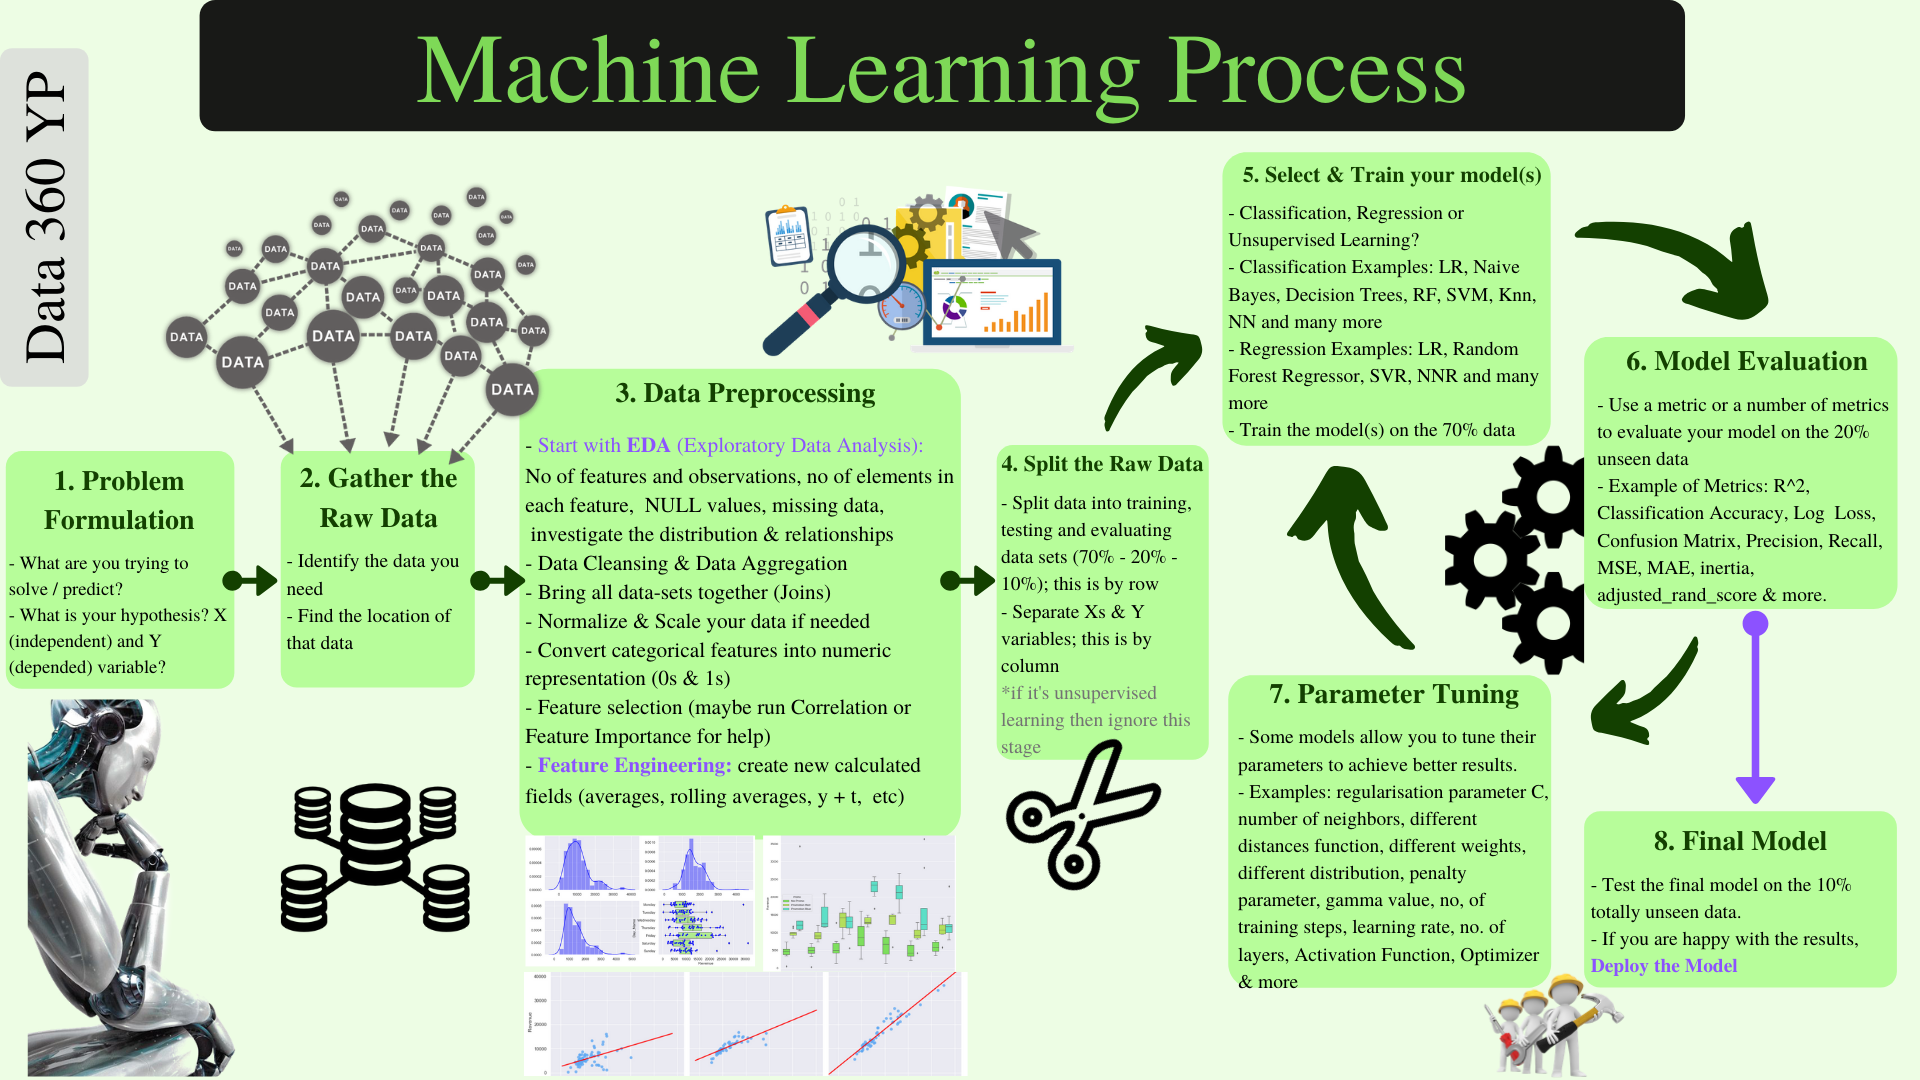

In [1]:
### Graphical ML Process

import os
from IPython.display import Image
PATH = "F:\\Github\\Python tutorials\\Introduction to ML - LR model\\"
Image(filename = PATH + "Machine Learning.png", width=900, height=900)

What is the ML process video here: https://youtu.be/vfA1ZKN4Y40

## 2. What is Unsupervised Learning

-	Is when you only have input data (X) without a corresponding target variable (y) to predict
- .
-	The aim is to model the underlying structure of the data in order to learn from data and identify groups of data (segments / clusters) with similar characteristics / behaviours


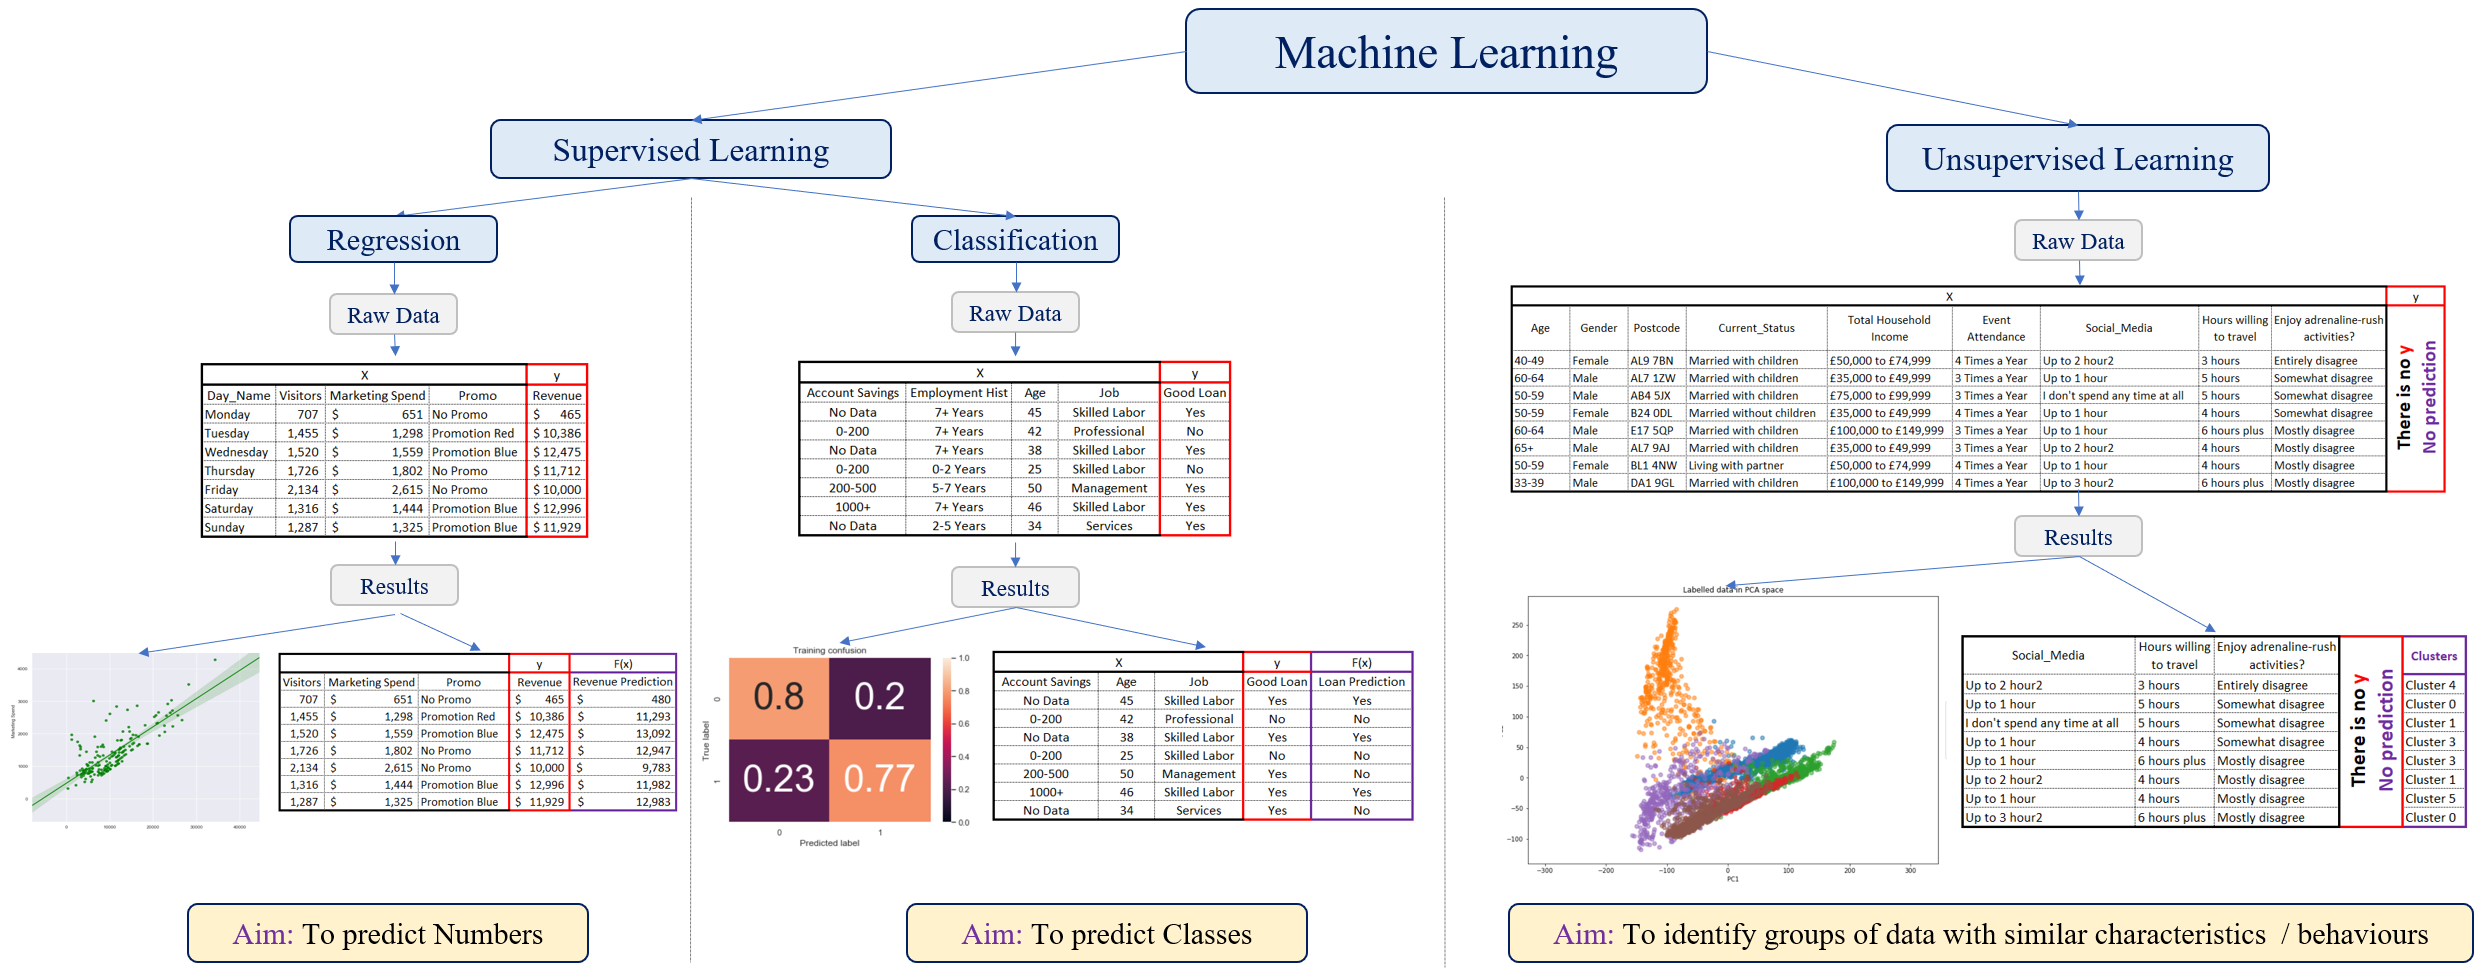

In [2]:
### Graphical - Supervised Vs Unsupervised Learning

PATH = "F:\\Github\\Python tutorials\\Introduction to ML - Unsupervised Learning\\"
Image(filename = PATH + "Supervised Vs Unsupervised Learning.png", width=1000, height=1000)

## 3. Problem formulation

- In this example, we want to create a Segmentation with customers who behave the same

- We want to investigate what are the common traits / behaviours in each Segment / Cluster

- We want to deploy our results in Power BI for the business to use

- We want to automate all this process for future data


## 4. Explaining how the whole automated process will work (Excel -> SQL -> Python -> SQL -> Power BI)

### Importing / Installing packages

In [3]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# import sys
# !conda list Check the packages installed

## 5. Loading the Raw Data into Python

In [37]:
#################################################################################################################
################################ Getting the file from local CSV      ###########################################
#################################################################################################################

# Loading the data
raw_data = pd.read_csv('F:\\Github\Python tutorials\\Introduction to ML - Unsupervised Learning\\Events Raw Data.csv')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(14783, 19)


,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [41]:
#################################################################################################################
##############################   Getting the file from SQL Server      ##########################################
#################################################################################################################

import pypyodbc as podbc

conn2 = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-8L98FK0\MSSQLSERVER08;"
                     "Database=Data360YP;"
                     "Trusted_Connection=yes;")

# rynning the SQL quey i need
SQL_Query = pd.read_sql_query('''SELECT * FROM [dbo].[Events_Raw_Data2]''', conn2)

#conn.close()



# Viz
SQL_Query.head()

,customer,age,gender,postcode,district,constituency,latitude,longitude,current_status,total_household_income,how_often_you_attend_entertaining_events_in_a_year,social_media,how_many_hours_are_you_willing_to_travel_to_attend_an_event,do_you_enjoy_adrenaline_rush_activities,are_food_areas_coffee_areas_bars_toilets_important_to_you,what_is_your_favourite_attraction_from_below,were_you_satisfied_with_the_last_event_you_attended_with_us,would_you_recommend_our_events_to_other_people,did_you_find_our_events_value_for_money
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.6922,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


## 5. Data Preprocessing

### 5.1. Exploratory Data Analysis & Data Cleaning


In [42]:
# Checking for null values

SQL_Query.isnull().sum()

customer                                                       0
age                                                            0
gender                                                         0
postcode                                                       0
district                                                       0
constituency                                                   0
latitude                                                       0
longitude                                                      0
current_status                                                 0
total_household_income                                         5
how_often_you_attend_entertaining_events_in_a_year             5
social_media                                                   5
how_many_hours_are_you_willing_to_travel_to_attend_an_event    5
do_you_enjoy_adrenaline_rush_activities                        5
are_food_areas_coffee_areas_bars_toilets_important_to_you      5
what_is_your_favourite_at

In [43]:
# Visualize the NULL observations


SQL_Query[SQL_Query['total_household_income'].isnull()]



,customer,age,gender,postcode,district,constituency,latitude,longitude,current_status,total_household_income,how_often_you_attend_entertaining_events_in_a_year,social_media,how_many_hours_are_you_willing_to_travel_to_attend_an_event,do_you_enjoy_adrenaline_rush_activities,are_food_areas_coffee_areas_bars_toilets_important_to_you,what_is_your_favourite_attraction_from_below,were_you_satisfied_with_the_last_event_you_attended_with_us,would_you_recommend_our_events_to_other_people,did_you_find_our_events_value_for_money
21,23,50-60,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,None,None,None,None,None,None,None,None,None,None
22,24,50-61,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,None,None,None,None,None,None,None,None,None,None
23,25,50-62,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,None,None,None,None,None,None,None,None,None,None
24,26,50-63,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,None,None,None,None,None,None,None,None,None,None
25,27,50-64,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,None,None,None,None,None,None,None,None,None,None


In [45]:
# Deleting the NULL values
SQL_Query = SQL_Query.dropna(subset = ['total_household_income'])

# Printing the shape
print(SQL_Query.shape)

# Visualize the NULL observations
SQL_Query.isnull().sum()

(14778, 19)


customer                                                       0
age                                                            0
gender                                                         0
postcode                                                       0
district                                                       0
constituency                                                   0
latitude                                                       0
longitude                                                      0
current_status                                                 0
total_household_income                                         0
how_often_you_attend_entertaining_events_in_a_year             0
social_media                                                   0
how_many_hours_are_you_willing_to_travel_to_attend_an_event    0
do_you_enjoy_adrenaline_rush_activities                        0
are_food_areas_coffee_areas_bars_toilets_important_to_you      0
what_is_your_favourite_at

In [46]:
# Investigate all the elements whithin each Feature 

for column in SQL_Query:
    unique_vals = np.unique(SQL_Query[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature customer :14778
The number of values for feature age :9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values for feature gender :2 -- ['Female' 'Male']
The number of values for feature postcode :14674
The number of values for feature district :225
The number of values for feature constituency :358
The number of values for feature latitude :13242
The number of values for feature longitude :13262
The number of values for feature current_status :8 -- ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The number of values for feature total_household_income :8 -- ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
The number of values for feature how_often_you_attend_entertaining_events_in_a_year :5

In [10]:
# Getting the columns we need

SQL_Query.columns

Index(['customer', 'age', 'gender', 'postcode', 'district', 'constituency',
       'latitude', 'longitude', 'current_status', 'total_household_income',
       'how_often_you_attend_entertaining_events_in_a_year', 'social_media',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event',
       'do_you_enjoy_adrenaline_rush_activities',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you',
       'what_is_your_favourite_attraction_from_below',
       'were_you_satisfied_with_the_last_event_you_attended_with_us',
       'would_you_recommend_our_events_to_other_people',
       'did_you_find_our_events_value_for_money'],
      dtype='object')

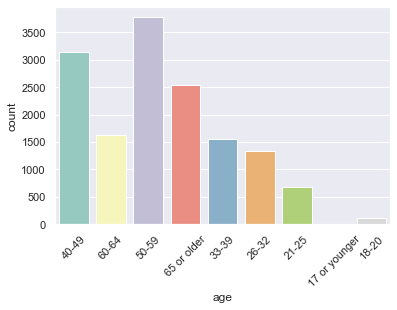

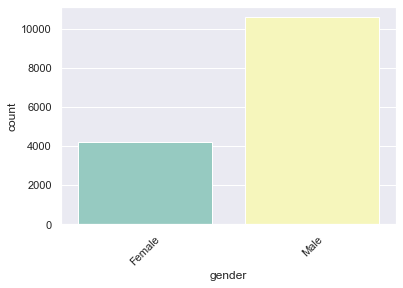

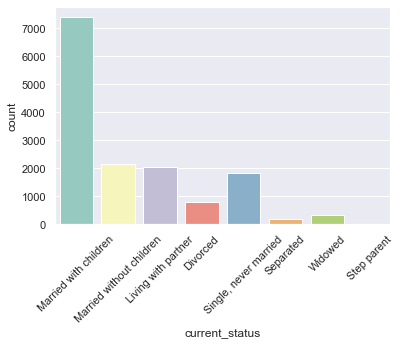

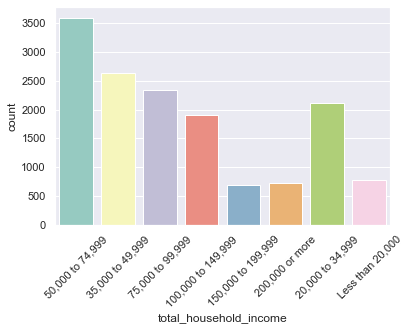

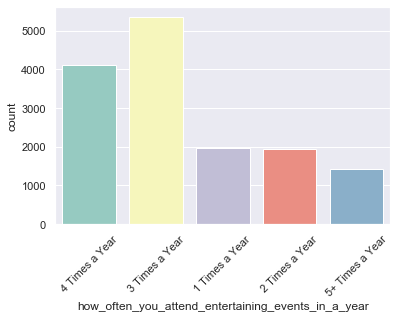

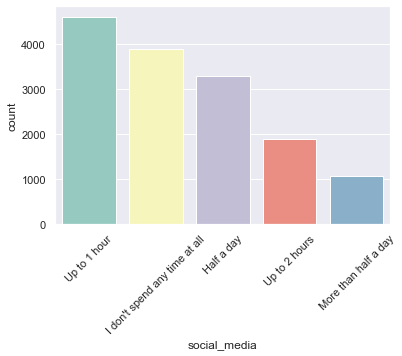

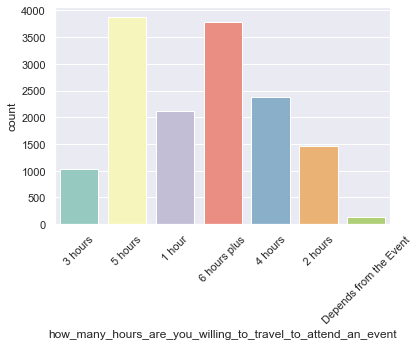

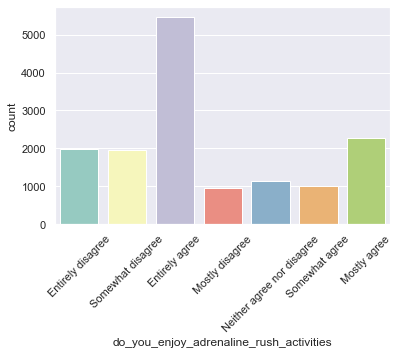

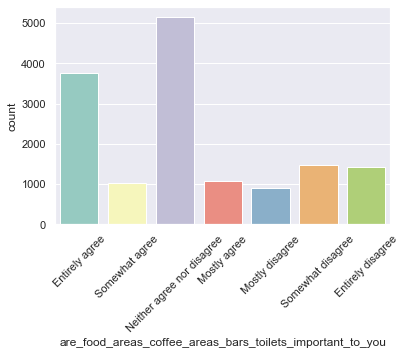

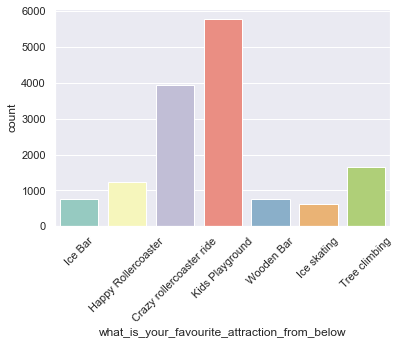

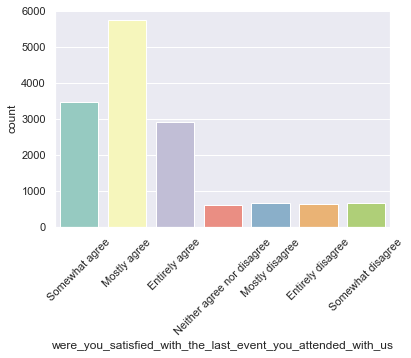

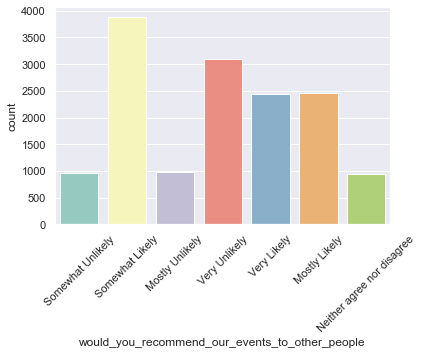

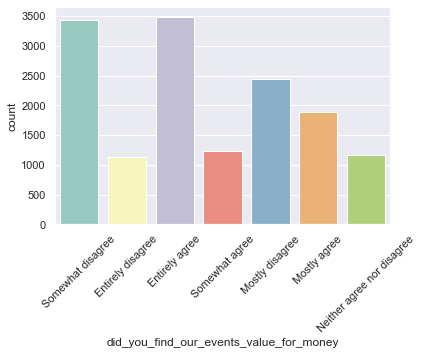

In [47]:
# Looping through all the features by our y variable - see if there is relationship

features = ['age', 'gender', 
       'current_status', 'total_household_income',
       'how_often_you_attend_entertaining_events_in_a_year', 'social_media',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event',
       'do_you_enjoy_adrenaline_rush_activities',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you',
       'what_is_your_favourite_attraction_from_below','were_you_satisfied_with_the_last_event_you_attended_with_us',
       'would_you_recommend_our_events_to_other_people',
       'did_you_find_our_events_value_for_money']

for f in features:
    sns.countplot(x = f, data = SQL_Query, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()
    


### 5.2 Feature Engineering - Creating a distance metric

In [51]:
# Creating a distance function - took this ready from the web

 
def haversine_vectorize(lon1, lat1, lon2, lat2):
 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [56]:
# Creating lat and long for our event - randoms

SQL_Query['Event Lat'] = '51.5073'
SQL_Query['Event Lon'] = '0.1657'


haversine_vectorize(SQL_Query['Event Lon'].astype(float) ,SQL_Query['Event Lat'].astype(float),SQL_Query['longitude'].astype(float) ,
                   SQL_Query['latitude'].astype(float))


SQL_Query['Distance from Event'] = haversine_vectorize(SQL_Query['Event Lon'].astype(float) ,SQL_Query['Event Lat'].astype(float),SQL_Query['longitude'].astype(float) ,
                   SQL_Query['latitude'].astype(float))

### 5.3 Feature Engineering - Numeric Representation

In [58]:
# Making categorical variables into numeric representation

print(SQL_Query.shape)

# keeping the columns we need - Drop the location columns for now, as we do not want them to impact our results (for now)
raw_data = SQL_Query[features]
print(raw_data.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(new_raw_data.shape)
# print the shape

new_raw_data.head()



(14778, 22)
(14778, 13)
(14778, 86)


,age_17 or younger,age_18-20,age_21-25,age_26-32,age_33-39,age_40-49,age_50-59,age_60-64,age_65 or older,gender_Female,...,would_you_recommend_our_events_to_other_people_Somewhat Unlikely,would_you_recommend_our_events_to_other_people_Very Likely,would_you_recommend_our_events_to_other_people_Very Unlikely,did_you_find_our_events_value_for_money_Entirely agree,did_you_find_our_events_value_for_money_Entirely disagree,did_you_find_our_events_value_for_money_Mostly agree,did_you_find_our_events_value_for_money_Mostly disagree,did_you_find_our_events_value_for_money_Neither agree nor disagree,did_you_find_our_events_value_for_money_Somewhat agree,did_you_find_our_events_value_for_money_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [59]:
raw_data.head()

,age,gender,current_status,total_household_income,how_often_you_attend_entertaining_events_in_a_year,social_media,how_many_hours_are_you_willing_to_travel_to_attend_an_event,do_you_enjoy_adrenaline_rush_activities,are_food_areas_coffee_areas_bars_toilets_important_to_you,what_is_your_favourite_attraction_from_below,were_you_satisfied_with_the_last_event_you_attended_with_us,would_you_recommend_our_events_to_other_people,did_you_find_our_events_value_for_money
0,40-49,Female,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,60-64,Male,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,50-59,Male,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,50-59,Female,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,60-64,Male,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


## 6.0 K-means Clustering

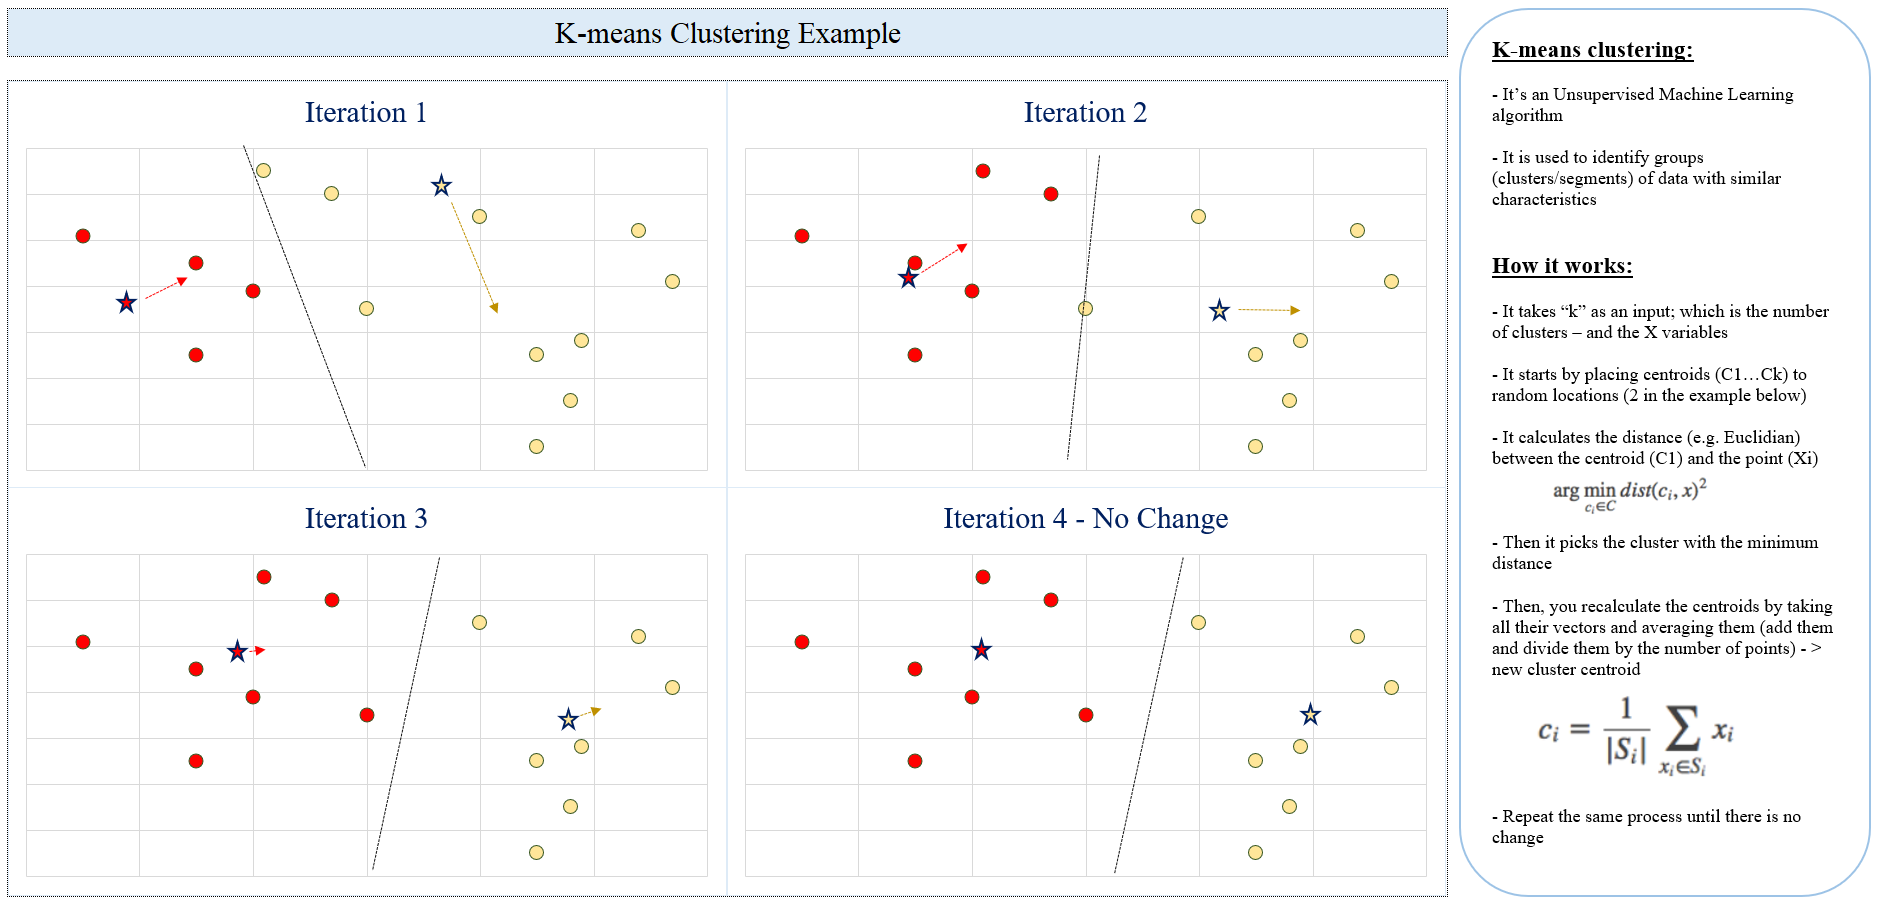

In [15]:
### Graphical - Supervised Vs Unsupervised Learning

PATH = "F:\\Github\\Python tutorials\\Introduction to ML - Unsupervised Learning\\"
Image(filename = PATH + "Kmeans.png", width=1000, height=1000)

In [16]:
# More details in how K-means works here: https://youtu.be/4b5d3muPQmA

In [62]:
# Running Kmeans

X_train = new_raw_data.values

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)


The clusters are:  [0 4 4 ... 0 1 4]
The Inertia is:  101900.25208839208


In [65]:
kmeans.labels_.shape

(14778,)

#### What is Inertia:
Inertia is the within-cluster sum of squares criterion. It is a metric that shows how internally coherent the clusters are. Inertia assumes that clusters are convex and isotropic; performs poorly elongated clusters, or manifolds with irregular shapes; better use hierarchical clustering here. Inertia also performs poorly in very high-dimensional spaces since Euclidean distances become inflated and no normalisation is applied beforehand; not a normalised metric.

In [72]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)




The innertia for : 2 Clusters is: 125619.02972065723
The innertia for : 3 Clusters is: 114905.38684266692
The innertia for : 4 Clusters is: 106337.17594801616
The innertia for : 5 Clusters is: 100865.1652923755
The innertia for : 6 Clusters is: 96432.51946729963
The innertia for : 7 Clusters is: 93814.48234646092
The innertia for : 8 Clusters is: 91696.5751387625
The innertia for : 9 Clusters is: 89724.9723040441
The innertia for : 10 Clusters is: 88493.21259624294
The innertia for : 11 Clusters is: 87581.06059954716
The innertia for : 12 Clusters is: 86617.666088801
The innertia for : 13 Clusters is: 85829.38420440158
The innertia for : 14 Clusters is: 85014.8527166815
The innertia for : 15 Clusters is: 84434.7438149334
The innertia for : 16 Clusters is: 83662.8356495057
The innertia for : 17 Clusters is: 82854.33711923643
The innertia for : 18 Clusters is: 82485.74994726635
The innertia for : 19 Clusters is: 82187.93372039594


In [68]:
no_of_clusters

range(2, 20)

Text(0.5, 1.0, 'Inertia Plot per k')

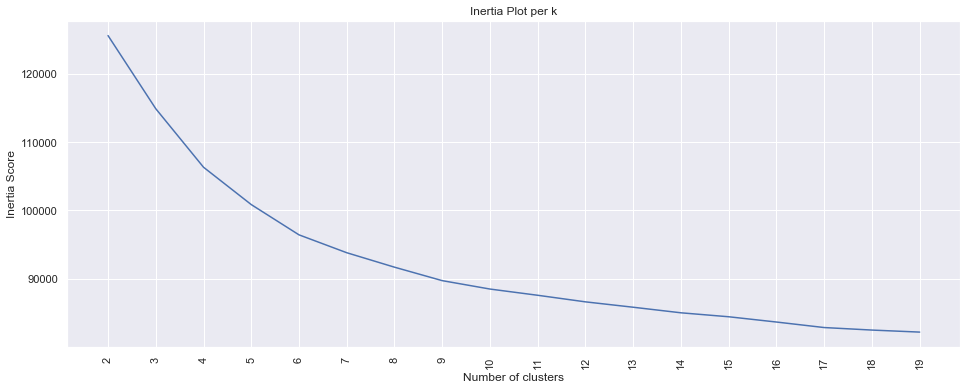

In [73]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [75]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,2208,1226,8492,1865,987


# NEXT: TBC in Next Video